In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
data=pd.read_csv("age.csv")
data

,age,insurance
0,19,0
1,28,0
2,33,1
3,18,0
4,32,1
5,31,1
6,46,1
7,37,1
8,38,1
9,60,1


In [5]:
data.describe()

,age,insurance
count,45.000000,45.000000
mean,36.444444,0.600000
std,15.106524,0.495434
min,18.000000,0.000000
25%,24.000000,0.000000
50%,32.000000,1.000000
75%,52.000000,1.000000
max,63.000000,1.000000


In [6]:
data.columns

Index(['age', 'insurance'], dtype='object')

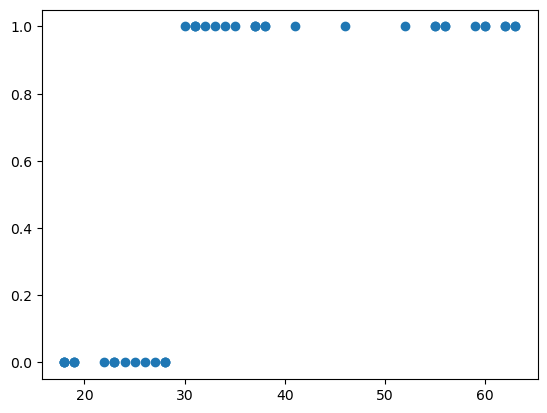

In [7]:
plt.scatter(data.age,data.insurance)     ##scatter
plt.show()

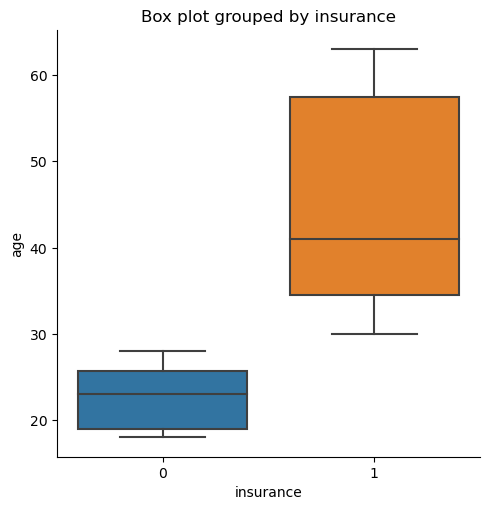

In [8]:
sns.catplot(x="insurance",y="age",kind="box",data=data)   
plt.title("Box plot grouped by insurance")
plt.show()

In [9]:
X=data[['age']]

In [10]:
X

,age
0,19
1,28
2,33
3,18
4,32
5,31
6,46
7,37
8,38
9,60


In [11]:
Y=data[['insurance']]

In [12]:
Y

,insurance
0,0
1,0
2,1
3,0
4,1
5,1
6,1
7,1
8,1
9,1


## spliting data into train and test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(31, 1)
(14, 1)
(31, 1)
(14, 1)


## LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model=LogisticRegression()

In [18]:
model.fit(X_train,Y_train)

LogisticRegression()

In [19]:
y_pred=model.predict(X_test)

In [20]:
y_pred    ###

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [21]:
model.predict([[22]])

array([0], dtype=int64)

In [22]:
model.predict([[35]])

array([1], dtype=int64)

In [23]:
model.score(X_train,Y_train)

1.0

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



## accuracy_score

In [26]:
from sklearn.metrics import accuracy_score


In [27]:
accuracy_score(Y_test, y_pred)


1.0

##  plot_confusion_matrix

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [29]:
p=confusion_matrix(Y_test, y_pred)
p

array([[8, 0],
       [0, 6]], dtype=int64)

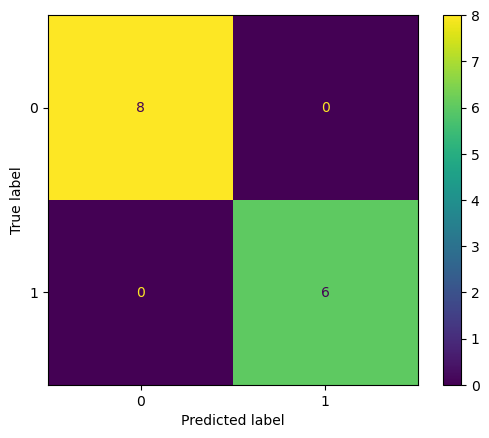

In [30]:
plot_confusion_matrix(model,X_test,Y_test)
plt.show()